In [1]:
import numpy as np
import keras 
from keras import backend as k

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

In [3]:
train_path = 'dogscats/train'

In [4]:
valid_path = 'dogscats/valid'

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_batch = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['cats','dogs'],batch_size=10)

Found 110 images belonging to 2 classes.


In [7]:
valid_batch = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=['cats','dogs'],batch_size=5)

Found 36 images belonging to 2 classes.


In [8]:
def plots(img,figsize=(12,6),rows=1,interp=False,titles=None):
    if type(img[0]) is np.ndarray:
        img = np.array(img).astype(np.uint8)
        if(img.shape[-1]!=3):
            img = img.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(img)//rows if len(img)%2 == 0 else len(img)//rows+1
    for i in range(len(img)):
        sp=f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(img[i],interpolation=None if interp else 'none')

In [9]:
imgs,labels =next(train_batch)

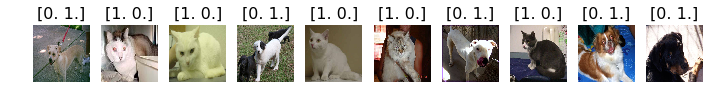

In [10]:
plots(imgs,titles=labels)

# CNN

In [11]:
model = Sequential([
        Conv2D(20,(3,3),activation='relu',input_shape=(224,224,3)),
        Flatten(),
        Dense(2, activation='softmax'),
        ])

In [12]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])
#lr=learning rate

In [ ]:
model.fit_generator(train_batch,steps_per_epoch=11,validation_data=valid_batch,validation_steps=7,epochs=5,verbose=2)

Epoch 1/5
 - 33s - loss: 8.1457 - acc: 0.4909 - val_loss: 6.2681 - val_acc: 0.6111
Epoch 2/5


#### steps_per_epoch=No.of pics in directory/ batch_size
#### validation_steps=No.of pics in directory/batch_size

# Prediction

In [ ]:
test_path = 'dogscats/test'

In [ ]:
test_batch=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),batch_size=10)

In [ ]:
test_imgs,test_labels = next(test_batch)
plots(test_imgs,titles=test_labels)

In [ ]:
predictions=model.predict_generator(test_batch,steps=3,verbose=0)

In [ ]:
predictions

# Fine Tuned VGG16 Model

In [ ]:
vgg16_model = keras.applications.vgg16.VGG16()

In [ ]:
vgg16_model.summary()

In [ ]:
type(vgg16_model)

In [ ]:
vgg16_model.layers.pop()

In [ ]:
vgg16_model.summary()

In [ ]:
for layer in vgg16_model.layers:
    layer.trainable = False       #does not update layers(Model gets frezzed)

In [ ]:
model=Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [ ]:
model.add(Dense(2,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batch,steps_per_epoch=11,validation_data=valid_batch,validation_steps=7,epochs=5,verbose=2)

In [ ]:
test_imgs,test_labels = next(test_batch)
#plots(test_imgs,titles=test_labels)

In [ ]:
plots(test_imgs,titles=test_labels)

In [ ]:
test_labels = test_labels[:,0]
test_labels

In [ ]:
predictions=model.predict_generator(test_batch,steps=3,verbose=0)

In [ ]:
predictions